# I. Keşifsel Veri Analizi

In [ ]:
from google.colab import drive

# Google Drive'ı bağla
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
import pandas as pd

# Dosyanın tam yolu
file_path = '/content/drive/MyDrive/Colab Notebooks/Titanic-Dataset.csv'

# CSV dosyasını oku
df = pd.read_csv(file_path)


In [60]:
df.head()  # Varsayılan olarak ilk 5 satırı gösterir

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
df.info()  # Veri tipi ve eksik değerleri gösterir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
df.shape  # (satır sayısı, sütun sayısı)

(891, 12)

In [63]:
df.describe() # Temel istatistiksel özet

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:
# Eksik değerleri tespit et
missing_values = df.isnull().sum()

# Eksik veri içeren sütunları filtreleyerek sadece eksik değerleri gösterelim
missing_values = missing_values[missing_values > 0]

# Sonucu daha düzenli görüntüleyelim
print("Eksik Değer Sayıları:\n")
print(missing_values)

Eksik Değer Sayıları:

Age         177
Cabin       687
Embarked      2
dtype: int64


In [65]:
# Eksik veri yüzdesini hesapla
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Sadece eksik verisi olan sütunları gösterelim
missing_percentage = missing_percentage[missing_percentage > 0]

# Sonucu daha okunaklı hale getirelim
print("Eksik Değer Yüzdeleri (%):\n")
print(missing_percentage.round(2))

Eksik Değer Yüzdeleri (%):

Age         19.87
Cabin       77.10
Embarked     0.22
dtype: float64


In [66]:
df.sample(n=5) # veri setinden 5 rastgele satır seçm

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q
584,585,0,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,NaN,C
211,212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.0000,NaN,S
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C
821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S


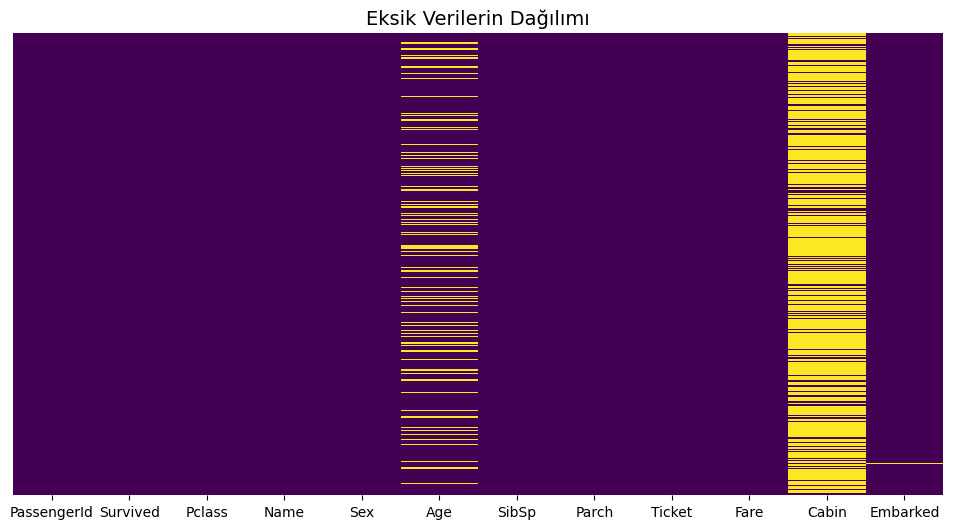

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Eksik Verilerin Dağılımı", fontsize=14)
plt.show()

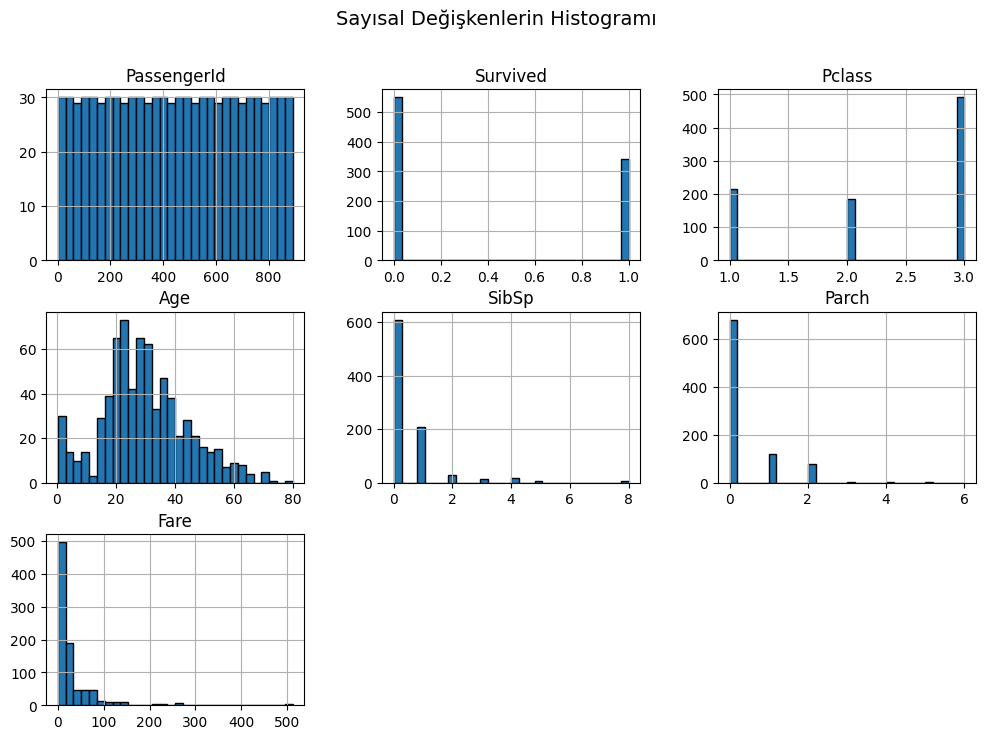

In [68]:
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Sayısal Değişkenlerin Histogramı", fontsize=14)
plt.show()

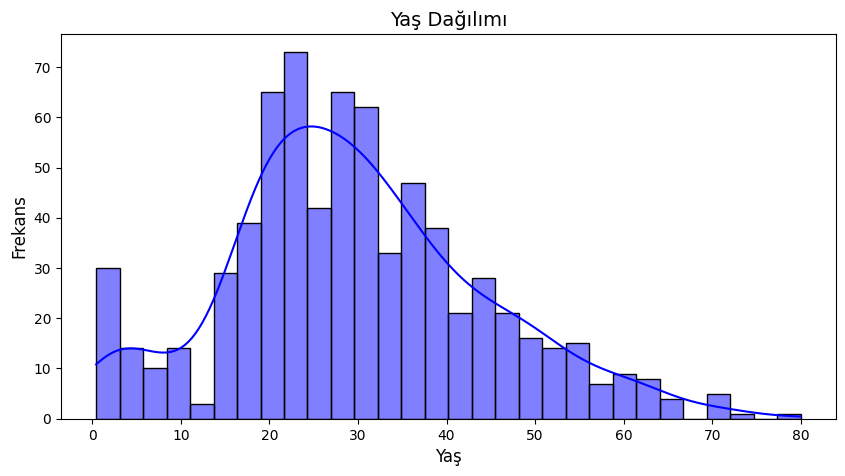

In [69]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Yaş Dağılımı", fontsize=14)
plt.xlabel("Yaş", fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.show()

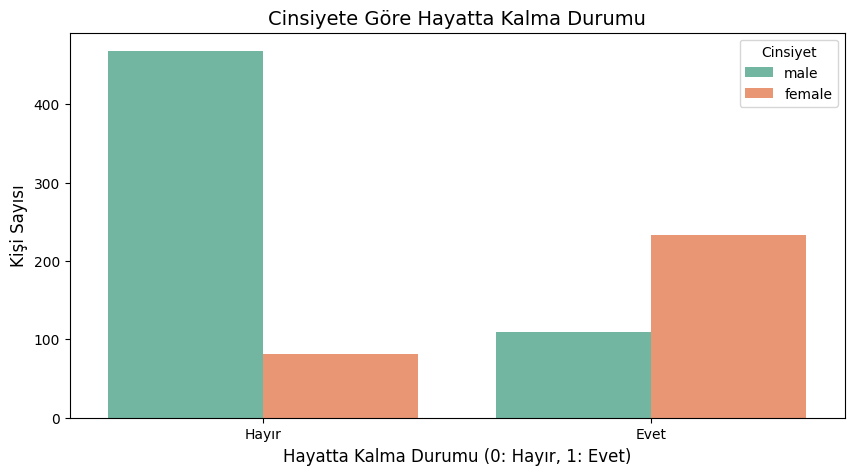

In [70]:
# Cinsiyetin hayatta kalma durumuna etkisini görselleştirme
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Survived"], hue=df["Sex"], palette="Set2")

# Grafik başlık ve etiketleri
plt.title("Cinsiyete Göre Hayatta Kalma Durumu", fontsize=14)
plt.xlabel("Hayatta Kalma Durumu (0: Hayır, 1: Evet)", fontsize=12)
plt.ylabel("Kişi Sayısı", fontsize=12)
plt.xticks([0, 1], ["Hayır", "Evet"])
plt.legend(title="Cinsiyet")

# Grafiği göster
plt.show()

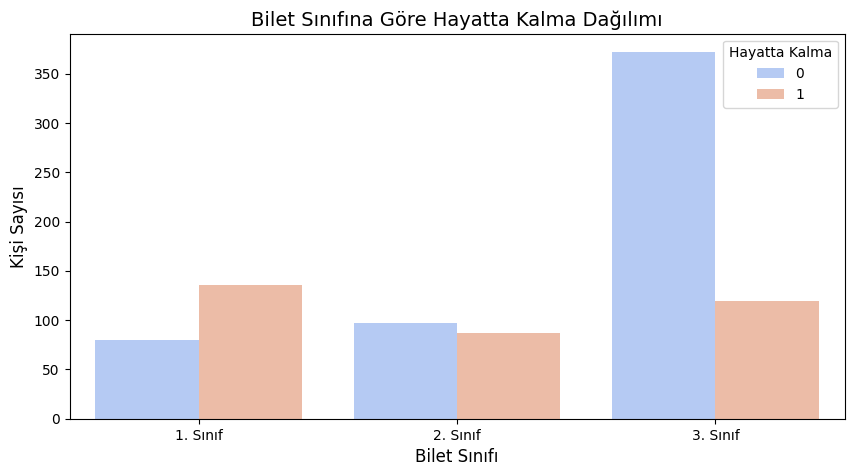

In [71]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Pclass"], hue=df["Survived"], palette="coolwarm")

plt.title("Bilet Sınıfına Göre Hayatta Kalma Dağılımı", fontsize=14)
plt.xlabel("Bilet Sınıfı", fontsize=12)
plt.ylabel("Kişi Sayısı", fontsize=12)
plt.xticks([0, 1, 2], ["1. Sınıf", "2. Sınıf", "3. Sınıf"])
plt.legend(title="Hayatta Kalma")
plt.show()

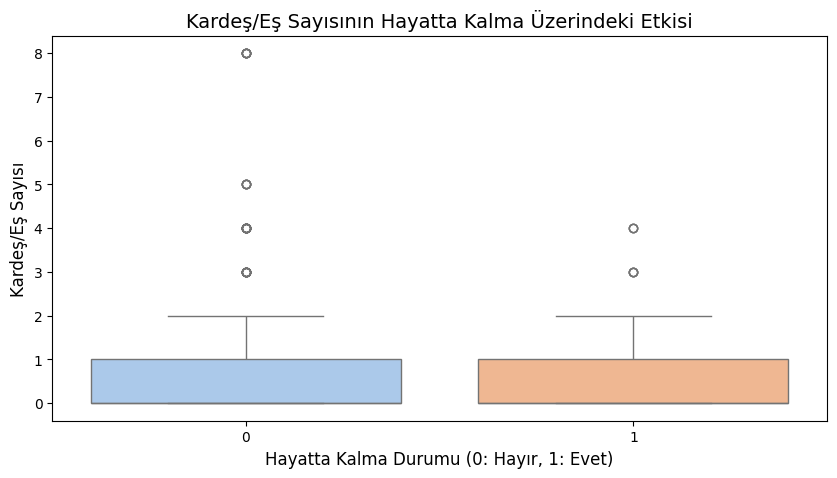

In [72]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Survived"], y=df["SibSp"], palette="pastel")

plt.title("Kardeş/Eş Sayısının Hayatta Kalma Üzerindeki Etkisi", fontsize=14)
plt.xlabel("Hayatta Kalma Durumu (0: Hayır, 1: Evet)", fontsize=12)
plt.ylabel("Kardeş/Eş Sayısı", fontsize=12)
plt.show()

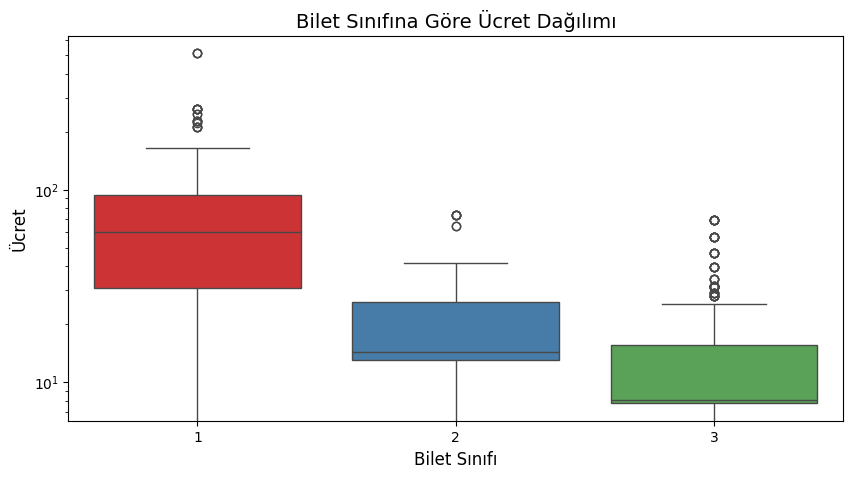

In [73]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Pclass"], y=df["Fare"], palette="Set1")

plt.title("Bilet Sınıfına Göre Ücret Dağılımı", fontsize=14)
plt.xlabel("Bilet Sınıfı", fontsize=12)
plt.ylabel("Ücret", fontsize=12)
plt.yscale("log")  # Ücretler arasında büyük farklılıklar olduğu için log dönüşümü
plt.show()

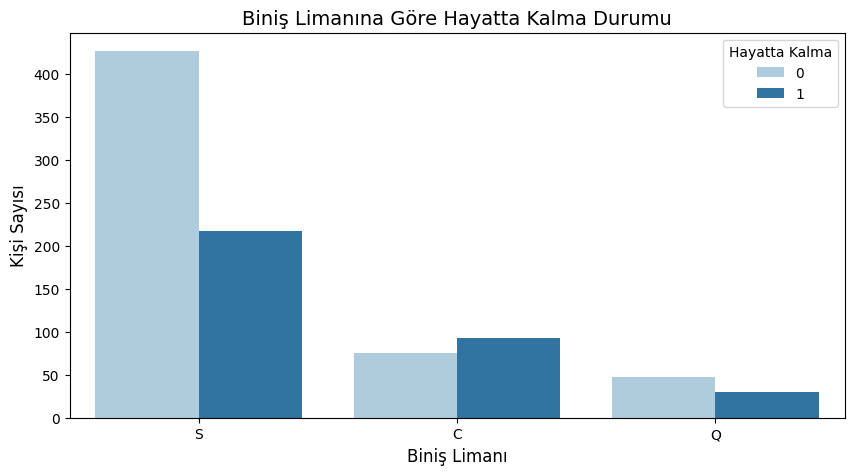

In [74]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Embarked"], hue=df["Survived"], palette="Paired")

plt.title("Biniş Limanına Göre Hayatta Kalma Durumu", fontsize=14)
plt.xlabel("Biniş Limanı", fontsize=12)
plt.ylabel("Kişi Sayısı", fontsize=12)
plt.legend(title="Hayatta Kalma")
plt.show()

# II. Veri Ön İşleme

In [75]:
# Eksik değer analizi
missing_values_before = df.isnull().sum()
print("Eksik Değer Analizi (Önce):")
print(missing_values_before)

Eksik Değer Analizi (Önce):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [76]:
# Age sütunundaki eksik değerleri medyan ile doldurma
df['Age'].fillna(df['Age'].median(), inplace=True)

# Embarked sütunundaki eksik değerleri mod (en sık görülen değer) ile doldurma
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Cabin sütununu tamamen kaldırma
df.drop(columns=['Cabin'], inplace=True)

In [77]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [78]:
# Aykırı değerleri belirlemek ve temizlemek için IQR yöntemi uygulanıyor

def remove_outliers_iqr(df, column):
    """ IQR yöntemi ile aykırı değerleri üst sınır ile değiştirir """
    Q1 = df[column].quantile(0.25)  # İlk çeyrek (Q1)
    Q3 = df[column].quantile(0.75)  # Üçüncü çeyrek (Q3)
    IQR = Q3 - Q1  # Interquartile Range (IQR)

    lower_bound = Q1 - 1.5 * IQR  # Alt sınır
    upper_bound = Q3 + 1.5 * IQR  # Üst sınır

    # Aykırı değerleri üst sınır ile değiştirme
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else x)

    return df

# Age ve Fare sütunları için IQR yöntemi ile aykırı değerleri temizleme
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')

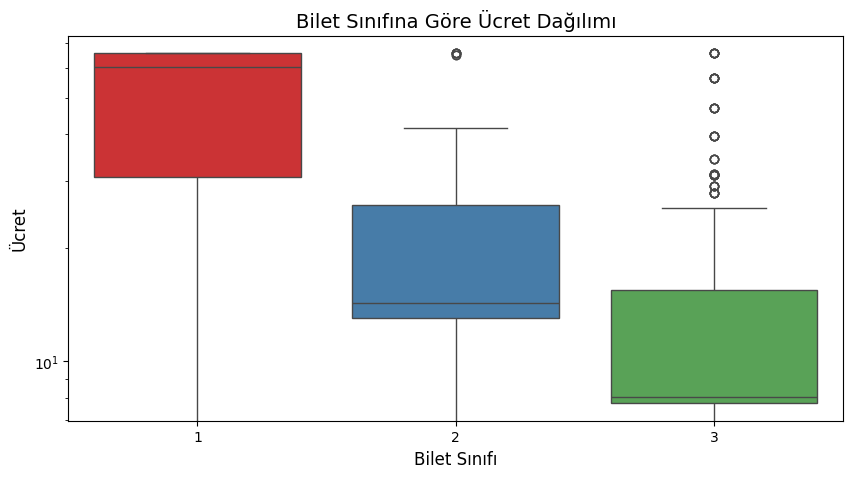

In [79]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Pclass"], y=df["Fare"], palette="Set1")

plt.title("Bilet Sınıfına Göre Ücret Dağılımı", fontsize=14)
plt.xlabel("Bilet Sınıfı", fontsize=12)
plt.ylabel("Ücret", fontsize=12)
plt.yscale("log")  # Ücretler arasında büyük farklılıklar olduğu için log dönüşümü
plt.show()

In [80]:
# 1. Sex Sütununu Sayısallaştırma
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# 2. Embarked Sütunu İçin One-Hot Encoding Uygulama
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,65.6344,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,False,True


In [83]:
# FamilySize değişkenini oluşturma (SibSp + Parch + 1)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# IsAlone değişkenini oluşturma (Eğer FamilySize == 1 ise 1, değilse 0)
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [84]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,False,True,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,65.6344,True,False,False,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,False,True,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,False,True,1,1


In [87]:
# Aykırı değerleri belirleme ve temizleme fonksiyonu (IQR yöntemi ile)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aşırı uç değerleri üst sınır ile değiştirme
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    return df


# Age ve Fare sütunlarındaki aykırı değerleri temizleme
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,False,True,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,65.6344,True,False,False,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,False,True,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,False,True,1,1


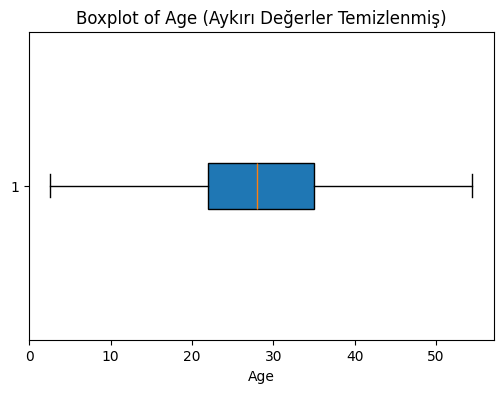

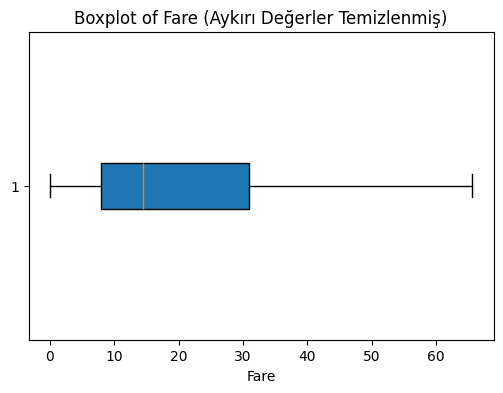

In [88]:
import matplotlib.pyplot as plt

# Boxplot çizme fonksiyonu
def plot_boxplot(df, column):
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[column], vert=False, patch_artist=True)
    plt.title(f"Boxplot of {column} (Aykırı Değerler Temizlenmiş)")
    plt.xlabel(column)
    plt.show()

# Age ve Fare için boxplot çizme
plot_boxplot(df, 'Age')
plot_boxplot(df, 'Fare')

In [90]:
# 1. FamilySize değişkenini oluşturma
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 2. IsAlone değişkenini oluşturma
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [92]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,False,True,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,65.6344,True,False,False,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,False,True,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,False,True,1,1


# MODELLEME (MAKİNE ÖĞRENMESİ AŞAMALARI)

In [93]:
# Gerekli kütüphanelerin import edilmesi

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## 🎯 1. Giriş ve Hedef Değişkenlerinin Belirlenmesi

In [94]:
# Hedef değişken (y)
y = df["Survived"]

# 'Survived' ve 'Name', 'Ticket', 'PassengerId' gibi model için anlamsız/benzersiz değişkenleri hariç tut
X = df.drop(columns=["Survived", "Name", "Ticket", "PassengerId"])

## ✂️ 2. Eğitim ve Test Setlerine Bölme

In [95]:
# Veriyi %80 eğitim, %20 test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## ⚖️ 3. Sayısal Değişkenlerin Ölçeklendirilmesi

In [96]:
# Ölçeklendirme işlemi
scaler = StandardScaler()

# Sadece sayısal sütunları ölçeklendirelim
num_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## 🧠 4. Farklı Makine Öğrenmesi Modellerinin Eğitilmesi ve Değerlendirilmesi

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")  # Bazı uyarıları bastırmak için

# Model listesi
models = {
    "Lojistik Regresyon": LogisticRegression(),
    "K-En Yakın Komşu": KNeighborsClassifier(),
    "Karar Ağacı": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Modelleri eğit ve test et
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"🔹 {name}")
    print(f"   Doğruluk (Accuracy): {acc:.3f}")
    print(f"   F1 Skoru: {f1:.3f}")
    print("-" * 40)

🔹 Lojistik Regresyon
   Doğruluk (Accuracy): 0.816
   F1 Skoru: 0.744
----------------------------------------
🔹 K-En Yakın Komşu
   Doğruluk (Accuracy): 0.771
   F1 Skoru: 0.682
----------------------------------------
🔹 Karar Ağacı
   Doğruluk (Accuracy): 0.788
   F1 Skoru: 0.721
----------------------------------------
🔹 Random Forest
   Doğruluk (Accuracy): 0.804
   F1 Skoru: 0.733
----------------------------------------
🔹 SVM
   Doğruluk (Accuracy): 0.832
   F1 Skoru: 0.766
----------------------------------------


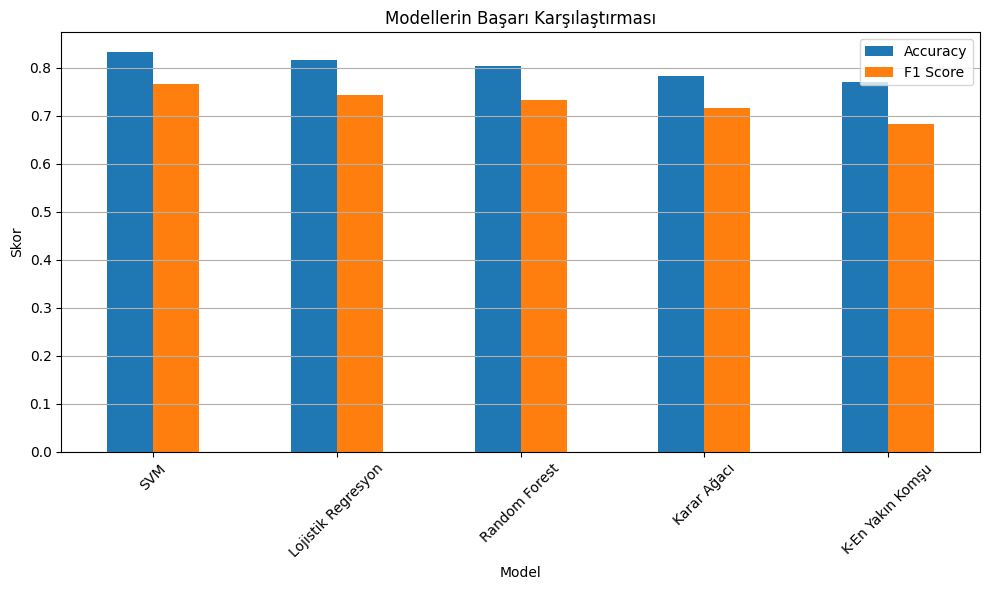

In [98]:
# Modelleri Görsel Olarak Karşılaştıralım

# Sonuçları tablo halinde kaydetmek için
model_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model_results.append((name, acc, f1))

# DataFrame'e dönüştürelim
results_df = pd.DataFrame(model_results, columns=["Model", "Accuracy", "F1 Score"])
results_df.set_index("Model", inplace=True)
results_df.sort_values(by="F1 Score", ascending=False, inplace=True)

# Görselleştirme
results_df.plot(kind="bar", figsize=(10,6), legend=True)
plt.title("Modellerin Başarı Karşılaştırması")
plt.ylabel("Skor")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

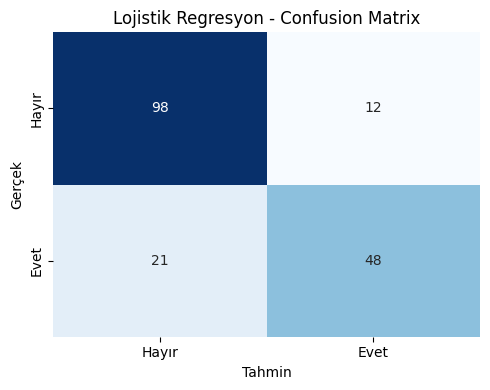

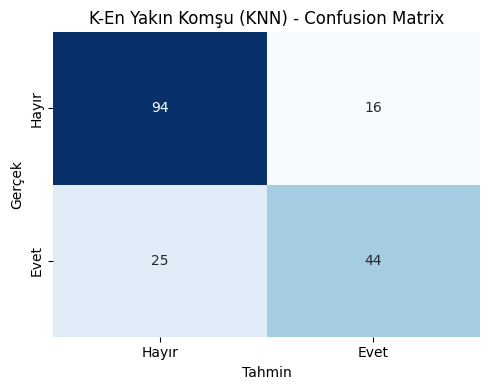

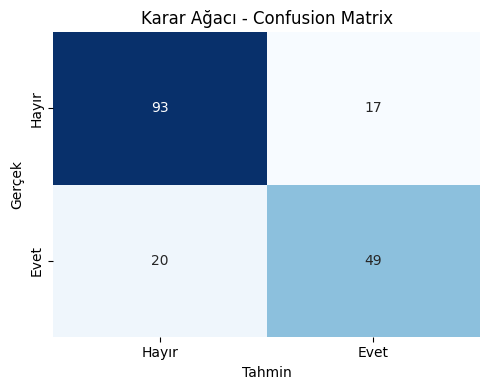

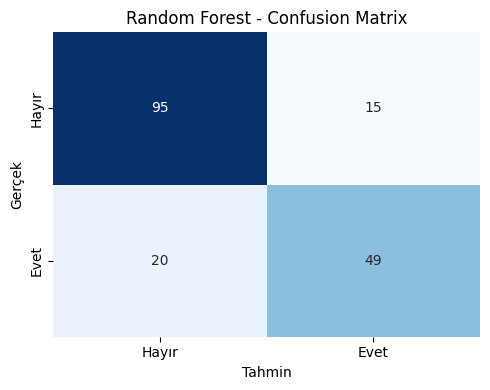

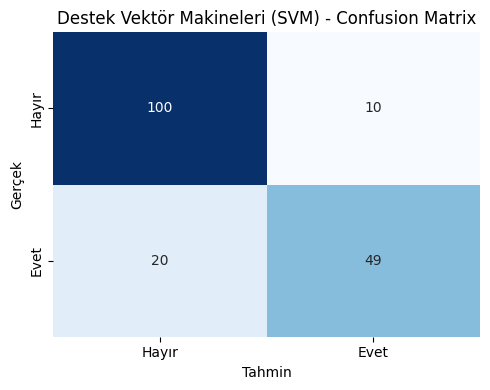

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Model listesini tanımlayalım
models = {
    "Lojistik Regresyon": LogisticRegression(),
    "K-En Yakın Komşu (KNN)": KNeighborsClassifier(),
    "Karar Ağacı": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Destek Vektör Makineleri (SVM)": SVC()
}

# Her model için confusion matrix çizimi
for name, model in models.items():
    # Modeli eğit
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion matrix hesapla
    cm = confusion_matrix(y_test, y_pred)

    # Görselleştirme
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Hayır", "Evet"], yticklabels=["Hayır", "Evet"])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Tahmin")
    plt.ylabel("Gerçek")
    plt.tight_layout()
    plt.show()

## 🌲 5. XGBoost Modeli Eğitimi ve Değerlendirmesi

🎯 XGBoost Model Performansı
Accuracy: 0.799
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



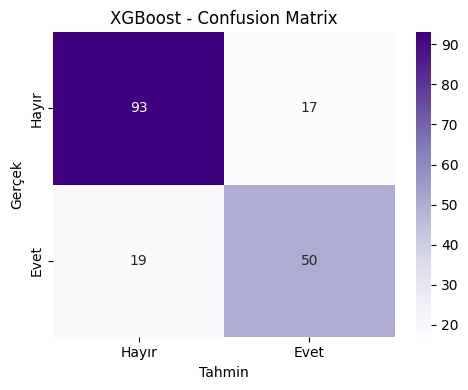

In [100]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("🎯 XGBoost Model Performansı")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.3f}")
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Purples", xticklabels=["Hayır", "Evet"], yticklabels=["Hayır", "Evet"])
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.tight_layout()
plt.show()


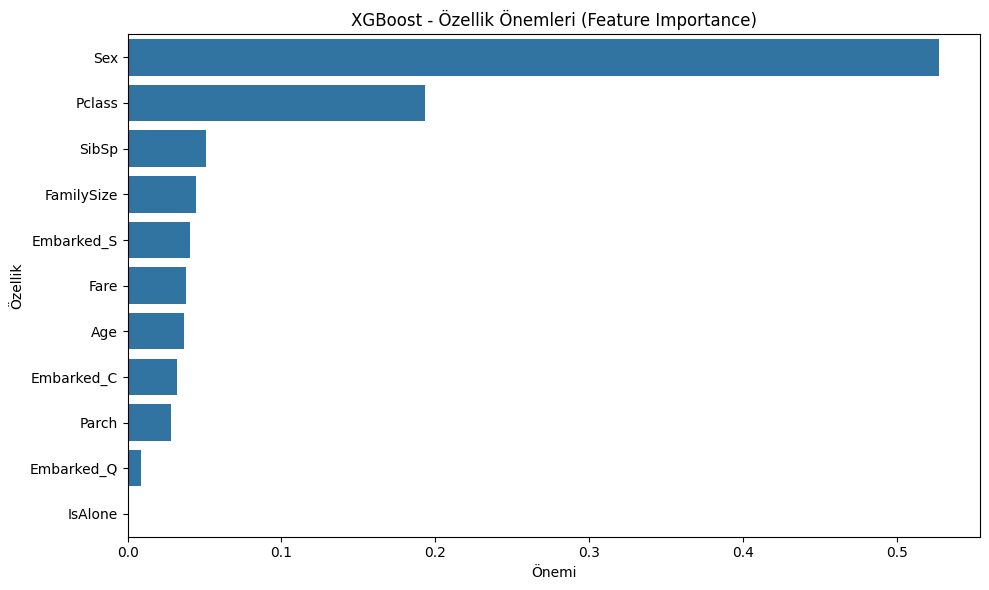

In [102]:
# Modelin Önemli Değişkenlerini Görüntüleme (Feature Importance)

importances = xgb_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    "Özellik": features,
    "Önemi": importances
}).sort_values(by="Önemi", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Önemi", y="Özellik", data=importance_df)
plt.title("XGBoost - Özellik Önemleri (Feature Importance)")
plt.tight_layout()
plt.show()


## 🧾 6. SHAP ile Model Yorumlama

In [103]:
!pip install shap

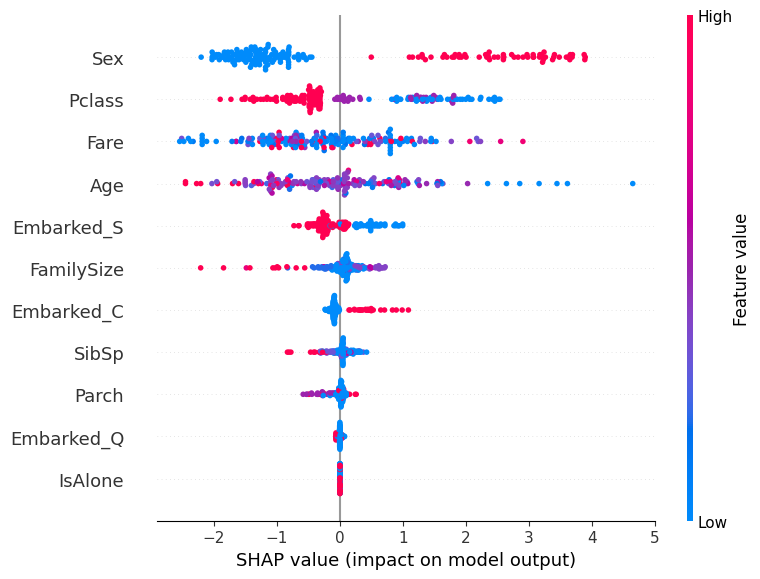

In [108]:
import shap

# Giriş verisini NumPy array olarak kullan
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Özellik isimleri korunur
shap.summary_plot(shap_values, X_test)

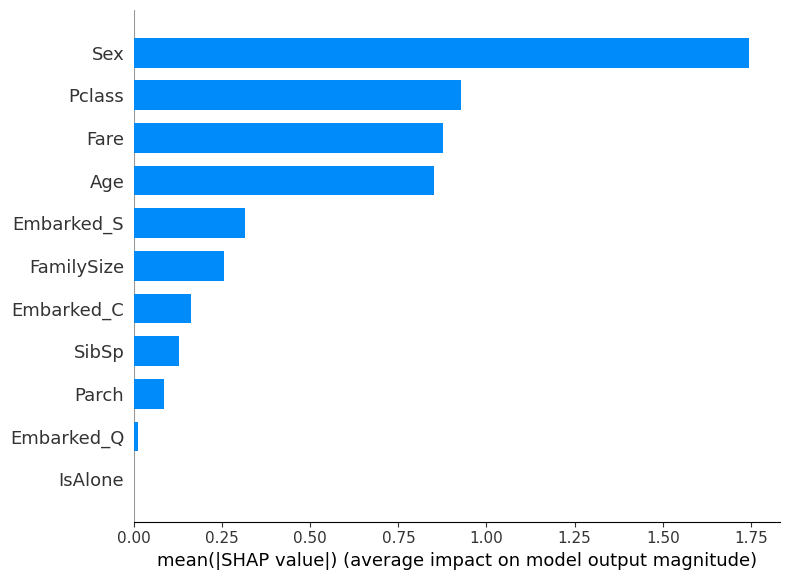

In [111]:
# Ortalama SHAP değerine göre sıralı bar grafiği

shap.summary_plot(shap_values, X_test, plot_type="bar")

In [114]:
selected_features = ['Sex', 'Pclass', 'Fare', 'Age', 'Embarked_S', 'FamilySize']

In [115]:
# Gerekli kütüphaneler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Yeni veri kümesini oluştur
X_selected = df[selected_features]
y = df['Survived']

# 2. Eğitim-test bölme
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# 3. Ölçekleme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Modeller
models = {
    "Lojistik Regresyon": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Karar Ağacı": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
}

# 5. Eğit ve değerlendir
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((name, acc, f1))
    print(f"🔹 {name}\n   Accuracy: {acc:.3f} | F1 Score: {f1:.3f}\n{'-'*40}")

🔹 Lojistik Regresyon
   Accuracy: 0.788 | F1 Score: 0.708
----------------------------------------
🔹 KNN
   Accuracy: 0.788 | F1 Score: 0.703
----------------------------------------
🔹 Karar Ağacı
   Accuracy: 0.804 | F1 Score: 0.741
----------------------------------------
🔹 Random Forest
   Accuracy: 0.804 | F1 Score: 0.737
----------------------------------------
🔹 SVM
   Accuracy: 0.804 | F1 Score: 0.701
----------------------------------------


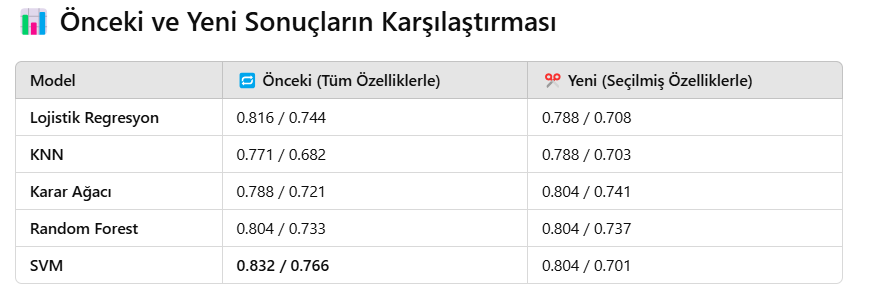

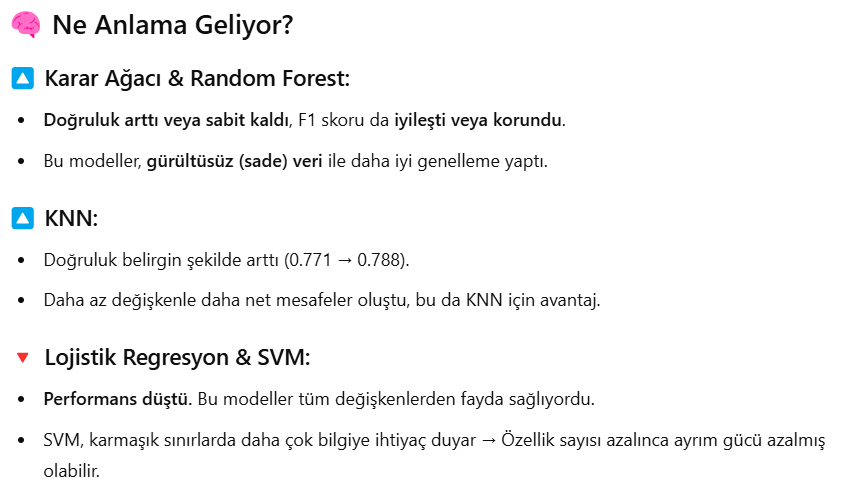

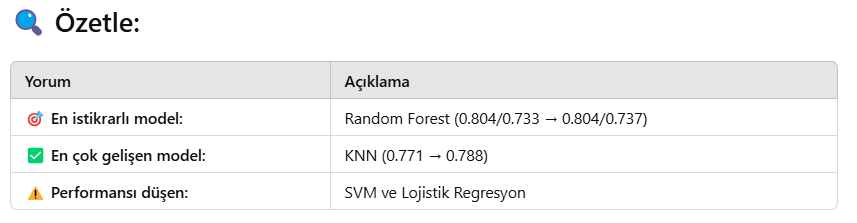

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Hiperparametre aralığını tanımla
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearch nesnesini oluştur
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',        # F1 skoru üzerinden değerlendirme
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Eğitimi gerçekleştir
grid_search.fit(X_train, y_train)

# En iyi modeli al
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


🎯 En İyi Random Forest Modeli (GridSearch sonrası)
Accuracy: 0.804
F1 Score: 0.724

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



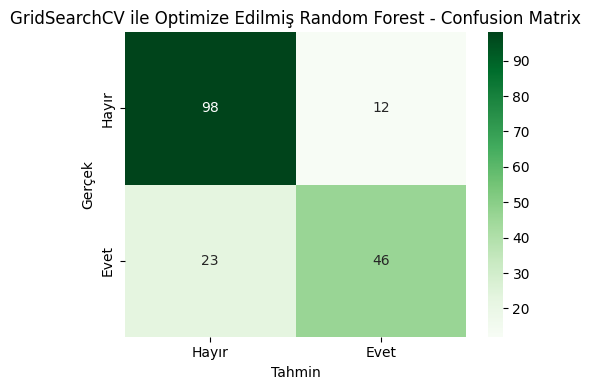

In [117]:
# Tahmin yap
y_pred_best_rf = best_rf.predict(X_test)

# Performans çıktısı
print("🎯 En İyi Random Forest Modeli (GridSearch sonrası)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best_rf):.3f}")
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred_best_rf))

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Greens", xticklabels=["Hayır", "Evet"], yticklabels=["Hayır", "Evet"])
plt.title("GridSearchCV ile Optimize Edilmiş Random Forest - Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.tight_layout()
plt.show()

In [118]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,False,True,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,65.6344,True,False,False,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,False,True,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,False,True,1,1


In [119]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Eğitim-test böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeli eğit
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# ✔️ Şimdi rastgele 5 yolcu seçelim
random_5 = X.sample(5, random_state=42)
random_5_scaled = scaler.transform(random_5)

# Tahmin olasılıklarını al
probabilities = model.predict_proba(random_5_scaled)

# Sonuçları görselleştirelim
results = random_5.copy()
results["Hayatta Kalma Olasılığı (%)"] = (probabilities[:, 1] * 100).round(2)
results["Tahmin"] = np.where(probabilities[:, 1] >= 0.5, "Yaşar", "Ölür")

print("🔍 Rastgele 5 Yolcu Tahmini:\n")
print(results[["Pclass", "Sex", "Age", "Fare", "FamilySize", "IsAlone", "Hayatta Kalma Olasılığı (%)", "Tahmin"]])

🔍 Rastgele 5 Yolcu Tahmini:

     Pclass  Sex   Age     Fare  FamilySize  IsAlone  \
709       3    0  28.0  15.2458           3        0   
439       2    0  31.0  10.5000           1        1   
840       3    0  20.0   7.9250           1        1   
720       2    1   6.0  33.0000           2        0   
39        3    1  14.0  11.2417           2        0   

     Hayatta Kalma Olasılığı (%) Tahmin  
709                        77.14  Yaşar  
439                         8.00   Ölür  
840                         3.00   Ölür  
720                       100.00  Yaşar  
39                         42.00   Ölür  


In [120]:
# Yeni yolcu için veri oluştur
new_passenger = pd.DataFrame([{
    "Pclass": 1,
    "Sex": 1,
    "Age": 29,
    "Fare": 100.0,
    "FamilySize": 2,
    "IsAlone": 0,
    "Embarked_C": 0,
    "Embarked_Q": 0,
    "Embarked_S": 1
}])

# Modelde kullanılan tüm sütunları eşle (eksik varsa 0 ile doldur)
for col in X.columns:
    if col not in new_passenger.columns:
        new_passenger[col] = 0

# Sıra uyuşmazlığı varsa düzelt
new_passenger = new_passenger[X.columns]

# Ölçekleme uygula
new_passenger_scaled = scaler.transform(new_passenger)

# Tahmin yap
prob = model.predict_proba(new_passenger_scaled)[0][1]
tahmin = "Yaşar" if prob >= 0.5 else "Ölür"

# Sonucu yazdır
print("🧍 Hayali Yolcu Profili Tahmini:")
print(f"Hayatta Kalma Olasılığı: %{round(prob * 100, 2)} → Tahmin: {tahmin}")

🧍 Hayali Yolcu Profili Tahmini:
Hayatta Kalma Olasılığı: %100.0 → Tahmin: Yaşar


In [121]:
# Yeni yolcu için veri oluştur
new_passenger = pd.DataFrame([{
    "Pclass": 3,
    "Sex": 0,
    "Age": 32,
    "Fare": 10.0,
    "FamilySize": 2,
    "IsAlone": 0,
    "Embarked_C": 0,
    "Embarked_Q": 0,
    "Embarked_S": 1
}])

# Modelde kullanılan tüm sütunları eşle (eksik varsa 0 ile doldur)
for col in X.columns:
    if col not in new_passenger.columns:
        new_passenger[col] = 0

# Sıra uyuşmazlığı varsa düzelt
new_passenger = new_passenger[X.columns]

# Ölçekleme uygula
new_passenger_scaled = scaler.transform(new_passenger)

# Tahmin yap
prob = model.predict_proba(new_passenger_scaled)[0][1]
tahmin = "Yaşar" if prob >= 0.5 else "Ölür"

# Sonucu yazdır
print("🧍 Hayali Yolcu Profili Tahmini:")
print(f"Hayatta Kalma Olasılığı: %{round(prob * 100, 2)} → Tahmin: {tahmin}")


🧍 Hayali Yolcu Profili Tahmini:
Hayatta Kalma Olasılığı: %29.0 → Tahmin: Ölür
